# Signal Processing
## Week \#2 Lab

### Introduction

We discussed ensemble averages in class which applies probabilty theory to random signals but in practical situations we will have a finite number of sequences, or perhaps only a single realiation of the random process. For ergodic processes, time averages (over all time) are equal to the statistical averages. Since we don't have infinite length sequences, we can compute estimates of the mean, variance, and autocorrrelation from one finite-length realization of the random process. In this lab we create random signals using the uniform and Gaussian distributions. We explore the autocorrelation and power power spectral density (psd) of random signals. The autocorrelation is used to find a periodic signal that is buried in noise.

### Install Python Packages

Import the necessary Python modules for implementing the lab.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import write

### Create Random Number Generator


Here we create the random generator object for use throughout this lab. If you would like reproducible results, you can seed the random generator by passing a seed value to default_rng().

In [ ]:
rng = np.random.default_rng()

### Random Signals

#### Uniform Noise

A uniform random process is a sequence of random variables with a uniform distribution in which the outcomes are equally likely. These outcomes are contstrained a known interval and the density function is:

\begin{equation*}
p_x(x) =
    \begin{cases}
        \frac{1}{b-a}, & a\leq x \leq b \\
        0, & \text{otherwise}
    \end{cases}
\end{equation*}

The following is a realization of a sequence of uniform random noise.

0.5080136284256354
0.2895343688533864


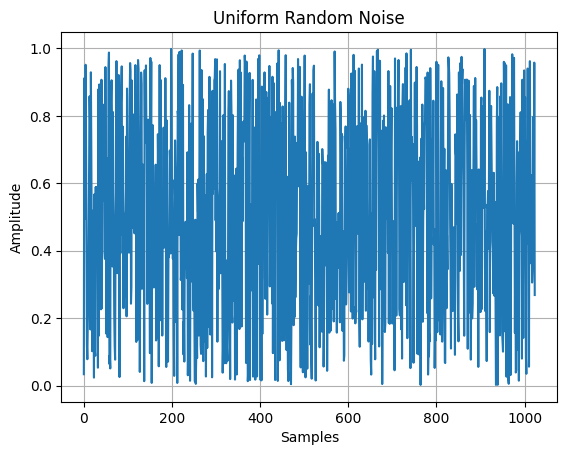

In [ ]:
# Generate uniform noise
v = rng.uniform(0,1,1024)

# Verify mean and standard deviation
print(np.mean(v))
print(np.std(v))

# Plot results
plt.plot(v)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Uniform Random Noise')
plt.grid()


#### Guassian Noise

A Gaussian random process is a sequence of random variables with a Gaussian or normal distribution. A Gaussian random variable with mean $m_x$ and variance $\sigma^2$ has the following probability density function:

\begin{equation*}
p_x(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-(x-m_x)^2/2\sigma^2}
\end{equation*}

In the following, we create a random Gaussian process and use a realization of the process to plot a histogram of the samples with an overlay of the denisty function, determine the autocorrelation, and plot the power spectral density. Since the samples of the process are zero mean and uncorrelated, we expect an autocorrelation that is the variance at zero lag and zero elsewhere which leads to a power spectral density that is flat across all frequencies.

-0.030361979398092518
1.203548060111511


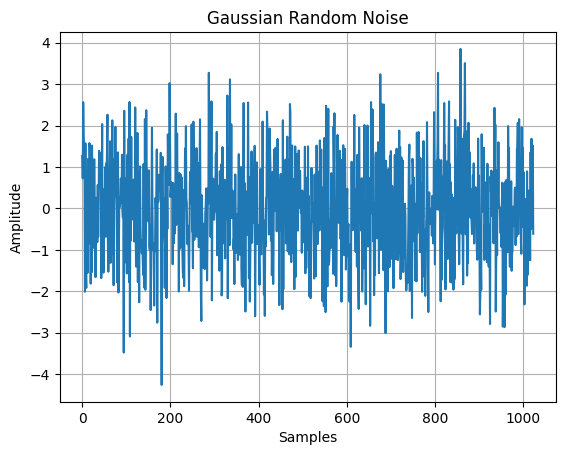

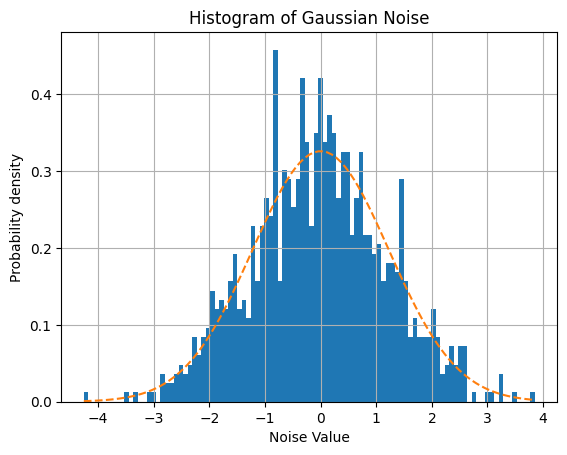

In [ ]:
# Generate random process with independent and identically distributed (iid) samples with Gaussian distribution

mu = 0 # define mean
sigma2 = 1.5 # define noise variance
sigma = np.sqrt(sigma2) #  noise standard deviation
v = rng.normal(mu, sigma, 1024)

# Verify mean and standard deviation from samples
print(np.mean(v))
print(np.std(v))

# Plot noise
plt.plot(v)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Gaussian Random Noise')
plt.grid()

# Plot histogram of Gaussian noise
fig, ax = plt.subplots()
n, bins, patches = ax.hist(v,100,density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Noise Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of Gaussian Noise');
ax.grid()

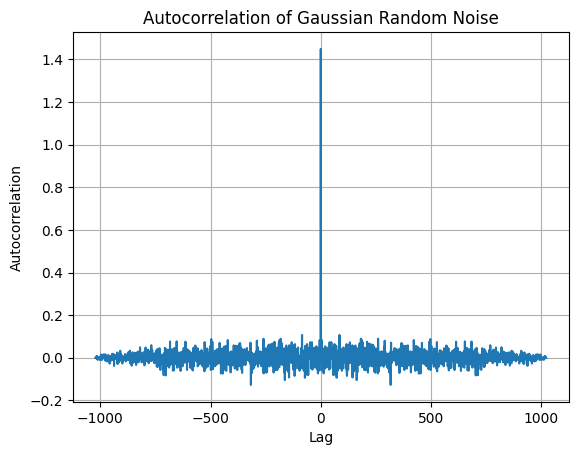

In [ ]:
# Compute and plot the autocorrelation of the Guassian noise
# The autocorrelation is scaled by the size of the signal so lag zero is the variance
vautocorr = signal.correlate(v,v)/v.size
lags = signal.correlation_lags(v.size, v.size)
fig, ax = plt.subplots()
ax.plot(lags,vautocorr)
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("Autocorrelation of Gaussian Random Noise")
ax.grid()

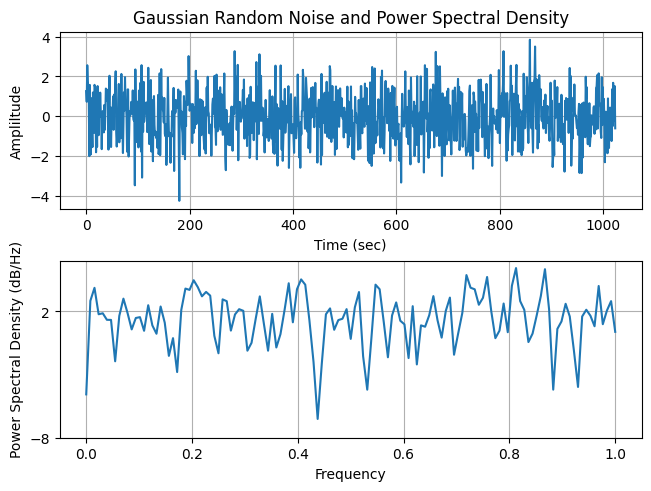

In [ ]:
# Compute and plot the power spectral density of Guassian noise
fig, (ax0, ax1) = plt.subplots(2,1,layout='constrained')
ax0.plot(v)
ax0.set_xlabel("Time (sec)")
ax0.set_ylabel("Ampliltude")
ax0.set_title("Gaussian Random Noise and Power Spectral Density")
ax0.grid()
ax1.psd(v);


#### Creating a Sound File

Below, we create a two-second Gaussian .wav file to hear this Gaussian noise.

In [ ]:
# Create two-second Gaussian noise WAV file at Fs=10 kHz
mu = 0 # define mean
sigma2 = 1 # define noise variance
sigma = np.sqrt(sigma2) # calculate noise standard deviation
Fs = 10000 # sample rate
samples = 2*Fs
noise = rng.normal(mu, sigma, samples)
amplitude = np.iinfo(np.int16).max # returns max in range of int16 data type
data = amplitude * noise # ensures amplitude of data covers entire range of data type
write("lab2gaussian.wav", Fs, data.astype(np.int16))

### Exercise

1. Create and and plot a realization of the following random signal using the Gaussian noise vector from above and a frequency of $f=0.2$ cycles per sample. With 1024 samples, this will give about 200 cycles of the cosine in this finite length signal.

    \begin{equation*}
    \cos(2\pi fn+\theta) + v[n]
    \end{equation*}

    where $\theta$ is a uniform random variable distributed between $0$ and $2\pi$ and $v[n]$ is a Gaussian random process. Can you tell that the signal plus noise is periodic from the plot, or is the sinusoid buried in the noise?
    
2. Compute and plot the autocorrelation from the samples. Verify that there is a periodic component in the autocorrelation function. You may need to only plot several hundred samples around zero lag, the center of the autocorrelation vector. How can you recover the period (or frequency) of the original signal from the periodic nature of the autorcorrelation function?
3. Plot the power spectral desnity. Can you identify the signal from the noise? What happens to the PSD as the frequency of the sinuoid is changed? The PSD frequency axis is normalized from zero to one where one represents half the sample frequency or $F_s/2$ or also discrete-time frequency of 1/2.
4. Create a 2-second realization of this signal and save as a .wav file. Are you able to hear the cosine within the noise? You probably won't be able to here it since it is buried in the noise. If you dramatically reduce the noise, you will be able to hear the sinusoid.

## Problem 1

We need to generate a signal that combines both a deterministic component (a cosine wave) and a stochastic component (Gaussian noise). This signal can be represented mathematically as:
$$
s[n]=\cos (2 \pi f n+\theta)+v[n]
$$
where $f=0.2$ cycles per sample represents the frequency of the cosine wave, $\theta$ is a random phase uniformly distributed between 0 and $2 \pi$, and $v[n]$ represents Gaussian noise.


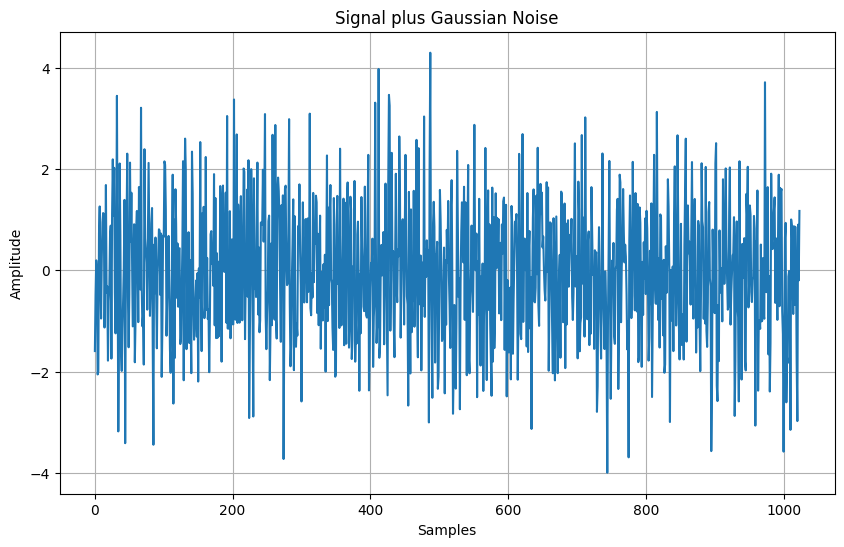

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f = 0.2 # frequency of cosine signal
n = np.arange(1024) # sample indices
theta = rng.uniform(0, 2*np.pi) # random phase

# Generate the sinusoidal signal
sinusoid = np.cos(2 * np.pi * f * n + theta)

# Gaussian noise vector `v` is assumed to have been generated earlier as per the lab instructions

# Signal plus noise
signal_plus_noise = sinusoid + v

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n, signal_plus_noise)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Signal plus Gaussian Noise')
plt.grid(True)
plt.show()



### Theoretical Background
The deterministic component $(\cos (2 \pi f n+\theta))$ introduces a periodic pattern into the signal, while the stochastic component $(v[n])$ introduces randomness that may mask the deterministic component depending on its magnitude.

### Discussion

The plot shows a noisy signal where the presence of the underlying cosine wave is not readily apparent. This is typical when the amplitude of the noise is comparable to or greater than the amplitude of the signal of interest. The noise appears to be randomly distributed about the zero-mean, as expected for Gaussian noise, and the variance seems consistent across the entire duration, indicating that the noise is indeed white and has a uniform power spectral density.

### Comparison with Theory
From a theoretical standpoint, the cosine function should produce a clear and regular waveform. However, in practice, when superimposed with a significant amount of Gaussian noise, the periodic nature of the cosine wave becomes obscured. The mean value of the noise should be zero, which seems to be the case here as the signal oscillates around the horizontal axis, indicating no apparent DC offset.

The standard deviation of the noise, which relates to the amplitude of the fluctuations in the noise, can make the periodic nature of the signal more or less discernible. If the standard deviation of the noise is much smaller than the amplitude of the cosine signal, the periodic nature would be visible. Conversely, if the noise has a high standard deviation, the periodic signal becomes buried in the noise, which seems to be what we observe in our plot.

### Ergodicity and Stationarity
The plot suggests the signal is stationary and ergodic, given that the statistical properties (mean and variance) do not change over time. In a practical sense, this allows us to estimate the theoretical statistical properties from the single realization provided, although it would be more accurate if we could average over many realizations.

## Problem 2

2. Compute and plot the autocorrelation from the samples. Verify that there is a periodic component in the autocorrelation function. You may need to only plot several hundred samples around zero lag, the center of the autocorrelation vector. How can you recover the period (or frequency) of the original signal from the periodic nature of the autorcorrelation function?

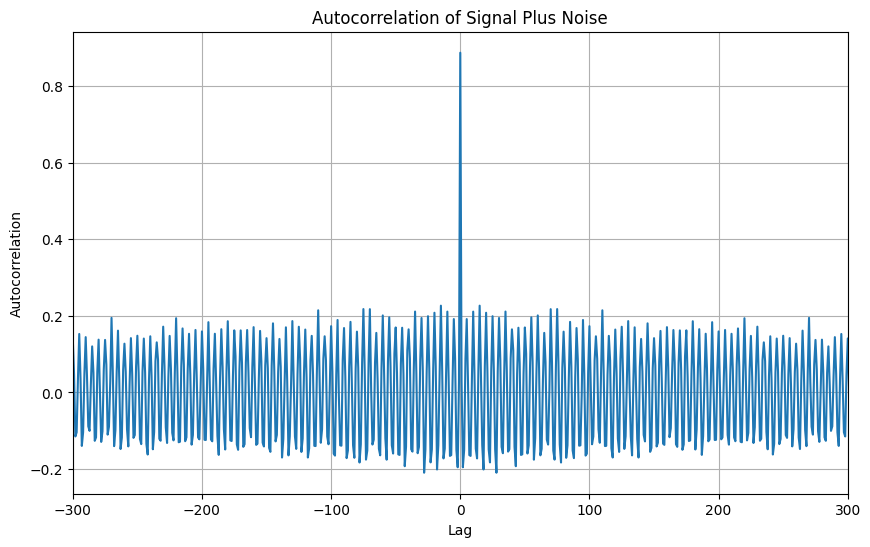

In [ ]:
from scipy import signal

# Compute autocorrelation using scipy's correlate
vautocorr = signal.correlate(signal_plus_noise, signal_plus_noise, mode='full')
# Normalization
vautocorr /= vautocorr.size
# Generate lags
lags = signal.correlation_lags(len(signal_plus_noise), len(signal_plus_noise), mode='full')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lags, vautocorr)
plt.xlim(-300, 300) # focusing on a range around zero lag
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Signal Plus Noise')
plt.grid(True)
plt.show()


### Observations from the Plot

1. **Central Peak**: The autocorrelation at lag zero is at its maximum, as expected, because a signal is always perfectly correlated with itself at zero displacement.
2. **Symmetry**: The autocorrelation function is symmetrical about lag zero, which is a property of the autocorrelation function for real-valued signals.
3. **Oscillatory Behavior**: There’s an oscillatory pattern in the autocorrelation function, which suggests the presence of a periodic component in the signal.

### Identifying the Periodic Component

To identify the periodicity of the original cosine signal, we would look for regular peaks in the autocorrelation function. These peaks occur at lags that correspond to the period of the cosine wave. Due to the noise, the peaks are not as pronounced as they would be in a clean signal.

### Theoretical vs. Practical

Theoretically, if the signal consisted of a pure cosine wave, the autocorrelation function would show sharp peaks at intervals of the cosine period. However, because the signal includes noise, the peaks are not as sharp and are superimposed on the baseline fluctuation caused by the noise.

### Frequency Recovery

To recover the frequency of the original signal, find the first significant peak in the autocorrelation function after the central peak at lag zero. The lag at which this peak occurs corresponds to the period of the signal, $T$. The frequency $f$ can then be calculated as the inverse of the period, $f=$ $\frac{1}{T}$, considering the sample rate to convert it to $\mathrm{Hz}$ if necessary.


Estimated period: None
Estimated frequency: None


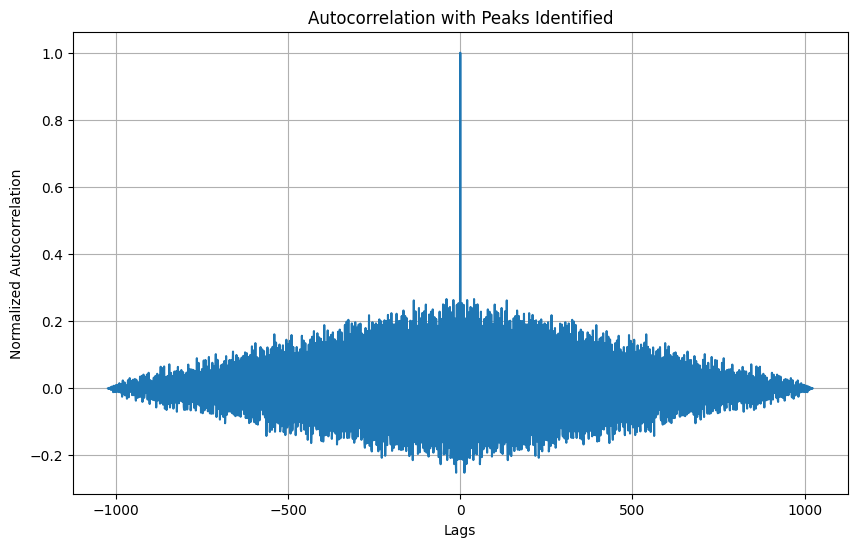

In [ ]:
from scipy.signal import find_peaks

# Find the peaks in the autocorrelation function
peaks, _ = find_peaks(autocorr_normalized, height=0.5) # height=0.5 is arbitrary

# Exclude the peak at zero lag
peaks = peaks[peaks != len(autocorr_normalized) // 2]

# Estimate the period from the first peak
if peaks.size > 0:
    period_est = lags[peaks[0]] - lags[len(autocorr_normalized) // 2]  # Distance to the first peak from center
    frequency_est = 1 / period_est  # Inverse to get the frequency
else:
    period_est = None
    frequency_est = None

print(f"Estimated period: {period_est}")
print(f"Estimated frequency: {frequency_est}")

# Plot the autocorrelation with the identified peaks
plt.figure(figsize=(10, 6))
plt.plot(lags, autocorr_normalized)
plt.plot(lags[peaks], autocorr_normalized[peaks], 'x')  # Mark the peaks
plt.xlabel('Lags')
plt.ylabel('Normalized Autocorrelation')
plt.title('Autocorrelation with Peaks Identified')
plt.grid()
plt.show()


## Problem 3

3. Plot the power spectral desnity. Can you identify the signal from the noise? What happens to the PSD as the frequency of the sinuoid is changed? The PSD frequency axis is normalized from zero to one where one represents half the sample frequency or $F_s/2$ or also discrete-time frequency of 1/2.


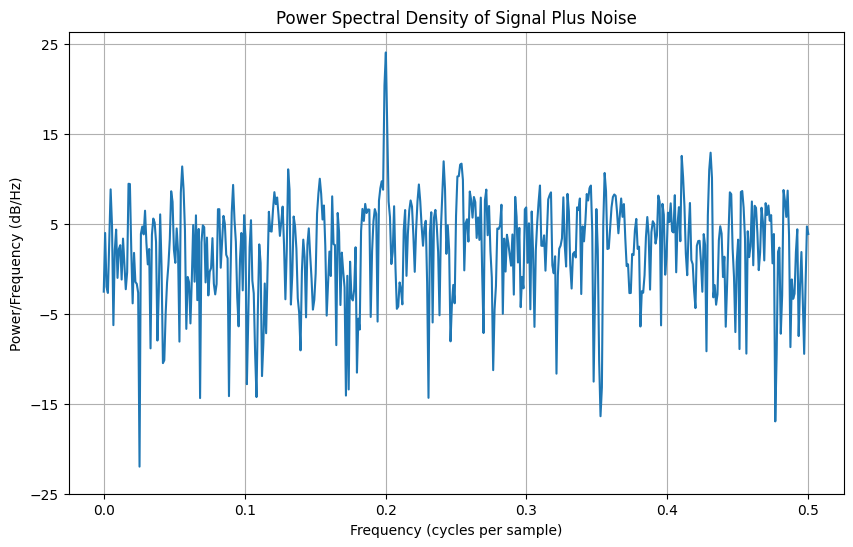

In [ ]:
import matplotlib.pyplot as plt

# Plot the Power Spectral Density
plt.figure(figsize=(10, 6))
plt.psd(signal_plus_noise, NFFT=1024, Fs=1)
plt.title('Power Spectral Density of Signal Plus Noise')
plt.xlabel('Frequency (cycles per sample)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()


### Discussion

- **Signal Identification:** In the PSD, the presence of the sinusoidal signal is indicated by a distinct peak at its frequency. This peak represents the concentration of power at the sinusoid's frequency, distinguishing it from the broader, flat distribution associated with white Gaussian noise.

- **Effect of Frequency Variation:** Changing the frequency of the sinusoid affects where the peak appears in the PSD. As the frequency increases (but remains below the Nyquist frequency), the peak moves rightward along the frequency axis. The visibility of the peak against the noise floor is crucial for signal detection and is influenced by the signal-to-noise ratio.

- **Analytical Insight:** The flat nature of the PSD across most frequencies illustrates the characteristic of white Gaussian noise, which has equal power at all frequencies. The peak corresponding to the sinusoidal signal's frequency breaks this flatness, serving as a marker for the signal's presence.

## Problem 4

4. Create a 2-second realization of this signal and save as a .wav file. Are you able to hear the cosine within the noise? You probably won't be able to here it since it is buried in the noise. If you dramatically reduce the noise, you will be able to hear the sinusoid.

In [ ]:
from scipy.io.wavfile import write
import numpy as np

# Parameters for the two-second signal
Fs = 10000  # Sampling frequency
duration = 2  # seconds
f = 0.2  # frequency of the cosine signal
theta = rng.uniform(0, 2*np.pi)  # random phase

# Calculate the number of samples
samples = int(Fs * duration)

# Time array
t = np.arange(samples) / Fs

# Generate the two-second signal: cosine plus noise
# Recalculate the Gaussian noise for the new signal length
mu = 0  # mean of the noise
sigma = np.sqrt(1.5)  # standard deviation of the noise
noise = rng.normal(mu, sigma, samples)

# Generate the sinusoidal signal
sinusoid = np.cos(2 * np.pi * f * t + theta)

# Combine sinusoidal signal and noise
signal_plus_noise = sinusoid + noise

# Normalize the signal to fit in the range of int16
amplitude = np.iinfo(np.int16).max
normalized_signal = (signal_plus_noise / np.max(np.abs(signal_plus_noise))) * amplitude

# Save as a WAV file
wav_file_name = "signal_plus_noise.wav"
write(wav_file_name, Fs, normalized_signal.astype(np.int16))


### Discussion

- **Audibility of the Sinusoidal Signal:** Although I was able to hear it, but in theory, whether the cosine wave is audible in the generated audio file depends significantly on the signal-to-noise ratio (SNR). In a high-noise environment, the sinusoidal component may be obscured, making it challenging to discern by ear.

- **Signal Normalization:** Before saving the signal as a WAV file, it's normalized to utilize the full dynamic range of the 'int16' data type, ensuring the audio playback is at a reasonable volume level.
